In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Loading Data

In [2]:
customers = pd.read_csv('../data/Customers.csv')
products = pd.read_csv('../data/Products.csv')
transactions = pd.read_csv('../data/Transactions.csv')

## EDA on Customers

In [3]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
customers.shape

(200, 4)

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [6]:
customers.dtypes

CustomerID      object
CustomerName    object
Region          object
SignupDate      object
dtype: object

In [7]:
customers.isnull().sum()

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Since there are no missing values we can directly start visulizing the data. But, the date is in object format so we will convert it to date time format to generate graphs without any errors

In [8]:
customers.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


In [9]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

In [10]:
customers.dtypes

CustomerID              object
CustomerName            object
Region                  object
SignupDate      datetime64[ns]
dtype: object

We can categorize the customer based on regions. considering the avaiable heads. Cause User ID(unique) and Name will be different and doesn't make any sense. So, here is the seggreagation of user based on region.

In [11]:
customers["Region"].value_counts()

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

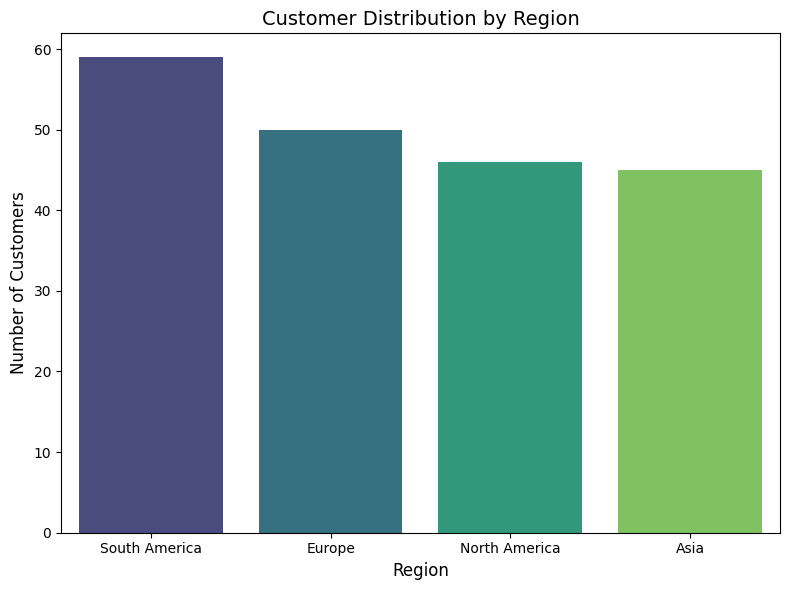

In [12]:
region_count = customers["Region"].value_counts().reset_index()
region_count.columns = ["Region", "Count"]

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(data=region_count, x="Region", y="Count",hue="Region", palette="viridis")

plt.title("Customer Distribution by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)

plt.tight_layout()
plt.show()

## EDA on Products


In [13]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [14]:
customers.shape

(200, 4)

In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [16]:
products.isnull().sum()

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

As there are no null / missing values we can start working on visuliztions


In [17]:
products.columns

Index(['ProductID', 'ProductName', 'Category', 'Price'], dtype='object')

In [20]:
products.dtypes

ProductID       object
ProductName     object
Category        object
Price          float64
dtype: object

In [19]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


We can see above the prize distribution of products in table format. Below is the Frequency dsitribution of prices

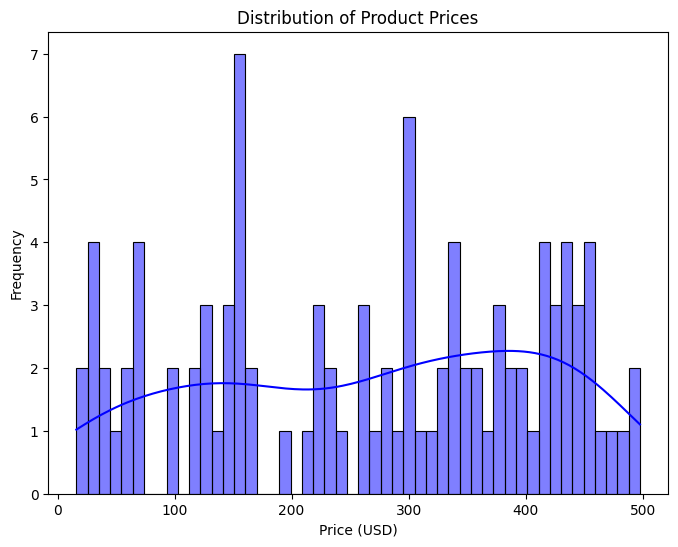

In [30]:
plt.figure(figsize=(8, 6))
sns.histplot(data=products, x="Price", kde=True, bins=50, color='blue')
plt.title('Distribution of Product Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

price distribution by product category

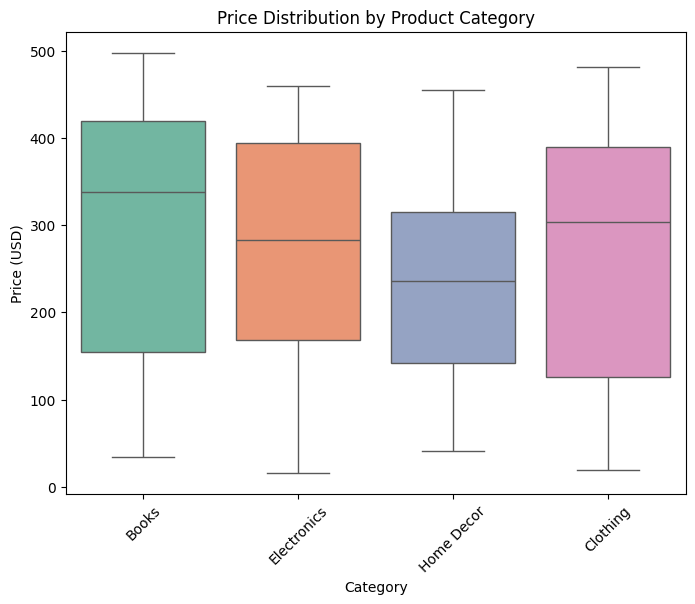

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=products, x="Category", y="Price",hue="Category" ,palette="Set2")
plt.title('Price Distribution by Product Category')
plt.xlabel('Category')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

Top 10 expensive products

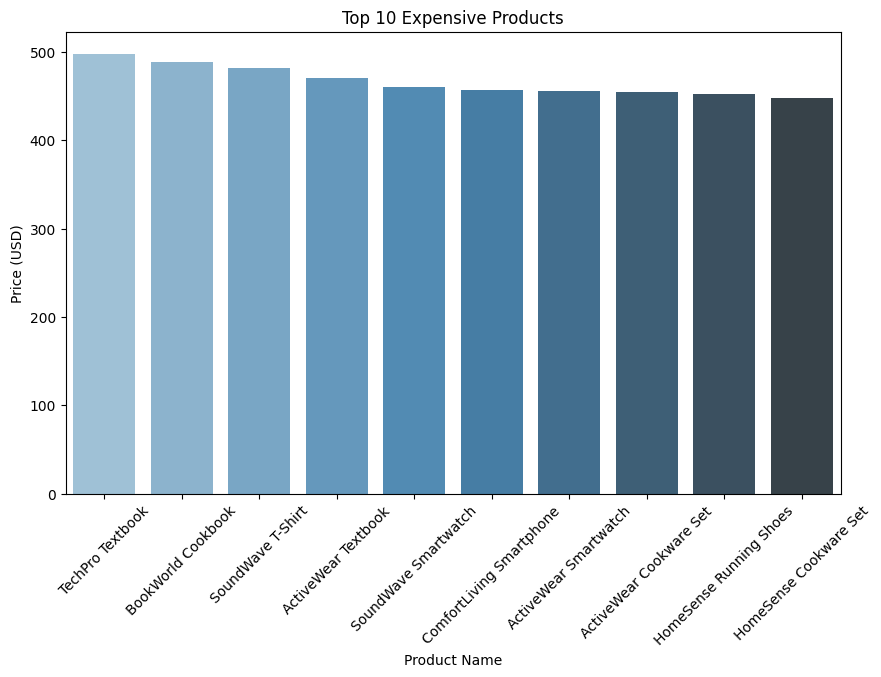

In [ ]:
top_expensive = products.sort_values(by="Price", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_expensive, x="ProductName", y="Price",hue="ProductName" , palette="Blues_d")
plt.title('Top 10 Expensive Products')
plt.xlabel('Product Name')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.show()

Products per category

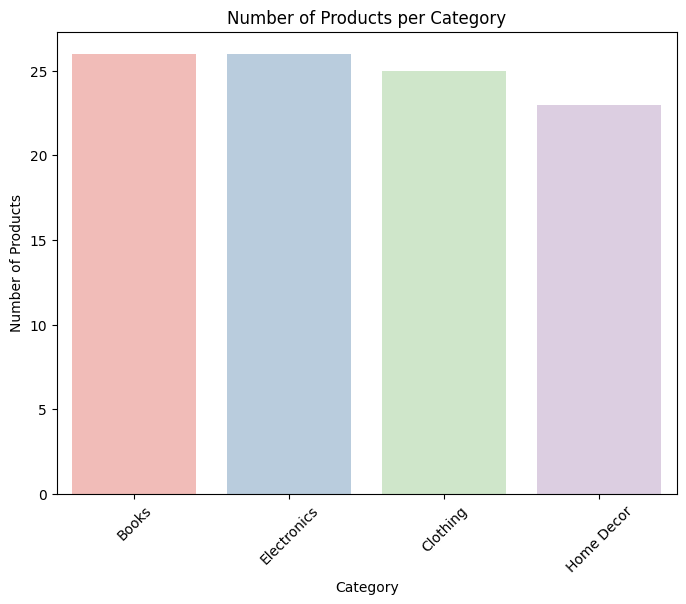

In [ ]:
category_count = products["Category"].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_count.index, y=category_count.values, hue=category_count.index, palette="Pastel1")
plt.title('Number of Products per Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

## EDA on Transactions

In [41]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [42]:
transactions.shape

(1000, 7)

In [44]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [45]:
transactions.isnull().sum()

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64

No Null / missing values in dataset

In [46]:
transactions.dtypes

TransactionID       object
CustomerID          object
ProductID           object
TransactionDate     object
Quantity             int64
TotalValue         float64
Price              float64
dtype: object

In [49]:
transactions.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

In [50]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [52]:
transactions.describe()

,TransactionDate,Quantity,TotalValue,Price
count,1000,1000.000000,1000.000000,1000.00000
mean,2024-06-23 15:33:02.768999936,2.537000,689.995560,272.55407
min,2023-12-30 15:29:12,1.000000,16.080000,16.08000
25%,2024-03-25 22:05:34.500000,2.000000,295.295000,147.95000
50%,2024-06-26 17:21:52.500000,3.000000,588.880000,299.93000
75%,2024-09-19 14:19:57,4.000000,1011.660000,404.40000
max,2024-12-28 11:00:00,4.000000,1991.040000,497.76000
std,NaN,1.117981,493.144478,140.73639


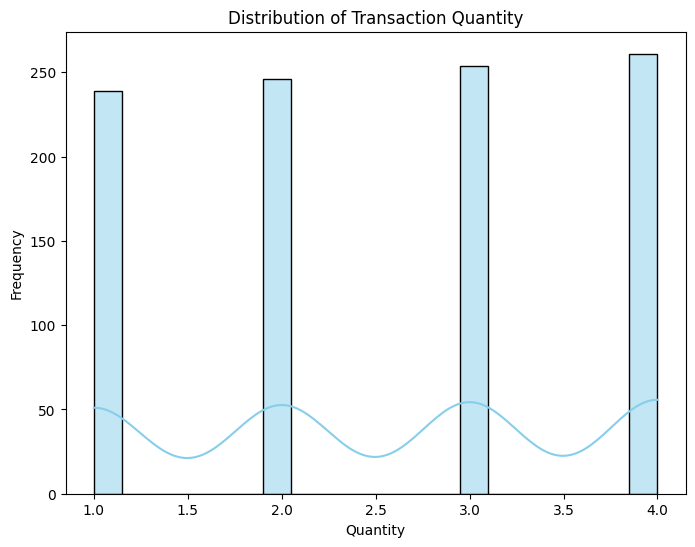

In [56]:
plt.figure(figsize=(8, 6))
sns.histplot(data=transactions, x="Quantity", kde=True, bins=20, color='skyblue')
plt.title('Distribution of Transaction Quantity')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

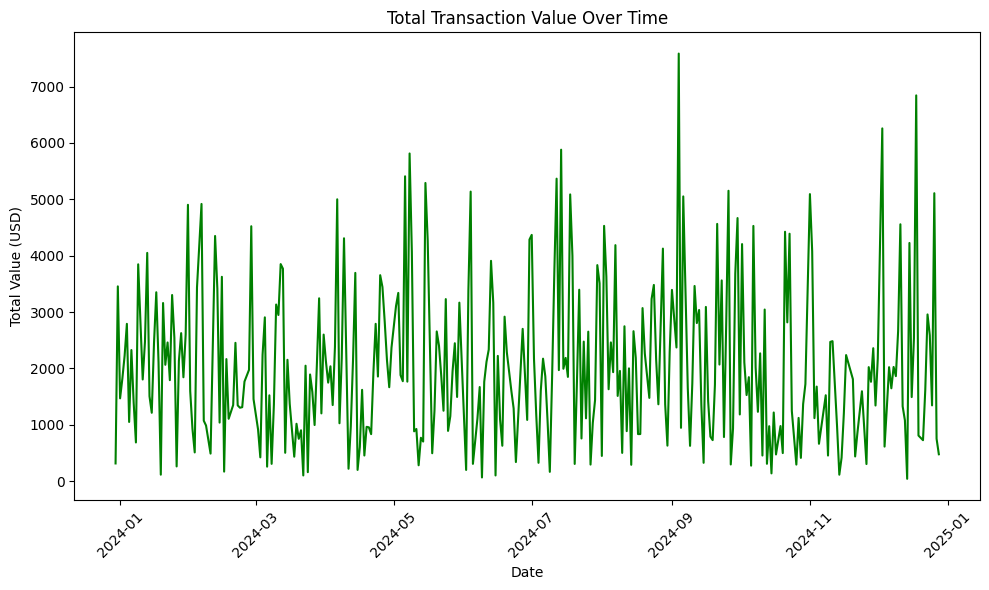

In [57]:
# Convert TransactionDate to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Group by date and sum total value
daily_total = transactions.groupby(transactions['TransactionDate'].dt.date)['TotalValue'].sum()

# Plot
plt.figure(figsize=(10, 6))
daily_total.plot(kind='line', color='green')
plt.title('Total Transaction Value Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

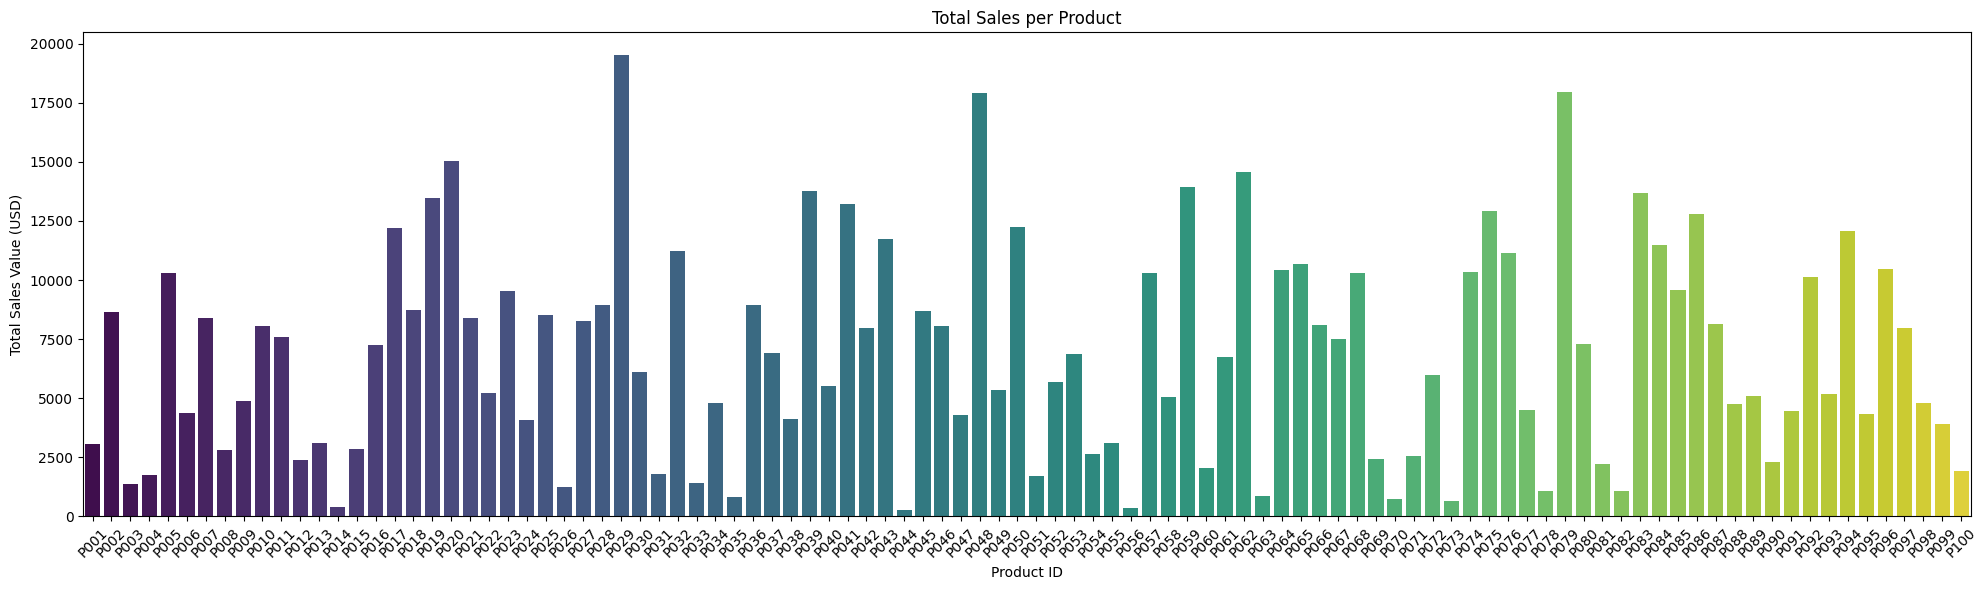

In [61]:
total_sales_per_product = transactions.groupby('ProductID').agg({'Quantity': 'sum', 'TotalValue': 'sum'}).reset_index()

plt.figure(figsize=(20, 6))
sns.barplot(data=total_sales_per_product, x='ProductID', y='TotalValue',hue='ProductID', palette="viridis")
plt.title('Total Sales per Product')
plt.xlabel('Product ID')
plt.ylabel('Total Sales Value (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Mix plots of all

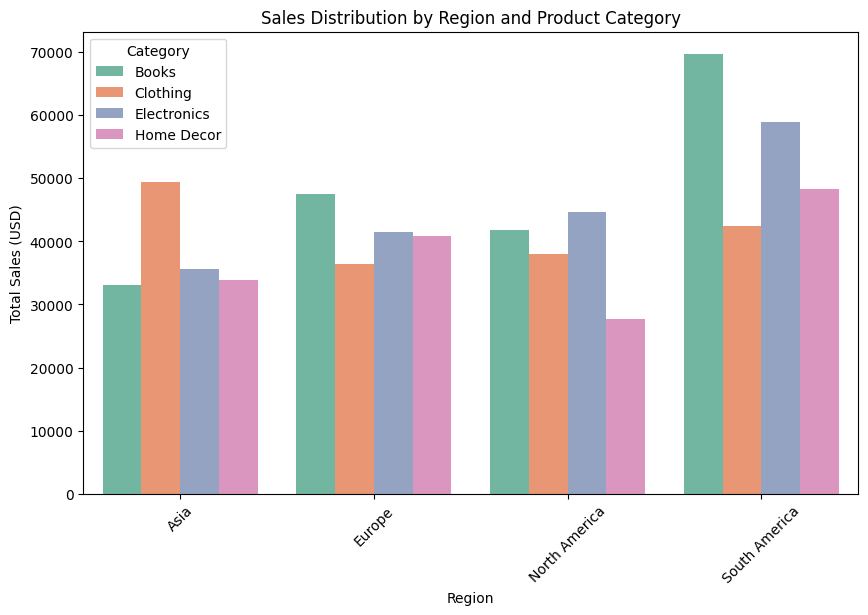

In [67]:
# Merge datasets
merged_data = pd.merge(transactions, customers[['CustomerID', 'Region']], on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products[['ProductID', 'Category']], on='ProductID', how='left')

# Group by Region and Category and calculate total sales
sales_by_region_category = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_region_category, x="Region", y="TotalValue", hue="Category", palette="Set2")
plt.title('Sales Distribution by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Total Sales (USD)')
plt.xticks(rotation=45)
plt.show()


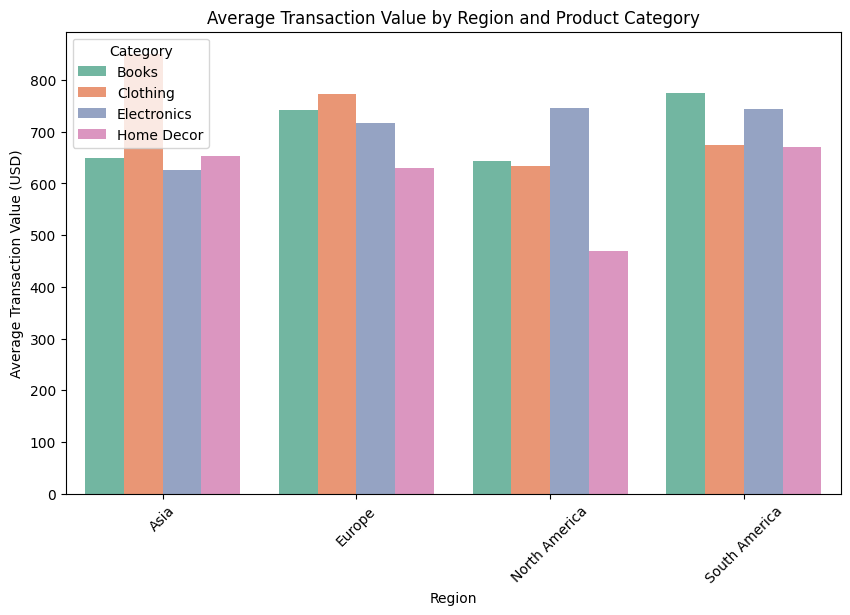

In [71]:
# Merge datasets
merged_data = pd.merge(transactions, customers[['CustomerID', 'Region']], on='CustomerID', how='left')
merged_data = pd.merge(merged_data, products[['ProductID', 'Category']], on='ProductID', how='left')

# Group by Region and Category to calculate average transaction value
avg_transaction_value = merged_data.groupby(['Region', 'Category'])['TotalValue'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_transaction_value, x="Region", y="TotalValue", hue="Category", palette="Set2")
plt.title('Average Transaction Value by Region and Product Category')
plt.xlabel('Region')
plt.ylabel('Average Transaction Value (USD)')
plt.xticks(rotation=45)
plt.show()